# CNN

In [1]:
import numpy as np
import pandas as pd
from yaml import safe_load
import yaml
import os
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filenames=[]
dataset_path = '/content/Data.csv'
df=pd.read_csv(dataset_path)

In [4]:
df.head()

,Unnamed: 0,desy_sort_key,gender_id,Diabetes,COPD,CKD,PVD,CAD,HyperTension,DiseaseType,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,0,118683983,F,0,0,0,0,0,1,2,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,1,130289775,F,1,0,0,0,0,0,1,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,2,108632239,F,0,0,0,0,0,1,2,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,3,117485425,M,0,0,0,0,0,1,2,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,4,129416237,F,0,0,0,0,0,1,2,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217


In [5]:
df['desy_sort_key'].value_counts()

desy_sort_key
118683983    1
109342687    1
107987781    1
113068987    1
117430375    1
            ..
130201387    1
127277215    1
135598229    1
124431365    1
124314165    1
Name: count, Length: 13599, dtype: int64

In [6]:
backup = df.copy()

In [7]:
df

,Unnamed: 0,desy_sort_key,gender_id,Diabetes,COPD,CKD,PVD,CAD,HyperTension,DiseaseType,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,0,118683983,F,0,0,0,0,0,1,2,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,1,130289775,F,1,0,0,0,0,0,1,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,2,108632239,F,0,0,0,0,0,1,2,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,3,117485425,M,0,0,0,0,0,1,2,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,4,129416237,F,0,0,0,0,0,1,2,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,13594,130463331,F,0,0,0,0,0,1,2,...,209.861854,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768
13595,13595,122447079,F,0,0,0,0,0,1,2,...,222.466384,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505
13596,13596,111252359,M,0,0,0,0,0,1,2,...,136.684044,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338
13597,13597,115838463,F,0,0,0,0,0,0,7,...,191.077492,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867


In [8]:
df['gender_id'].value_counts()

gender_id
F    8807
M    4792
Name: count, dtype: int64

In [9]:
col_names = df.columns
df = df.drop(df.columns[0],axis=1)
for c in col_names:
    df = df.replace("?", np.NaN)
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df

,desy_sort_key,gender_id,Diabetes,COPD,CKD,PVD,CAD,HyperTension,DiseaseType,Age,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,118683983,F,0,0,0,0,0,1,2,39,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,130289775,F,1,0,0,0,0,0,1,55,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,108632239,F,0,0,0,0,0,1,2,65,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,117485425,M,0,0,0,0,0,1,2,45,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,129416237,F,0,0,0,0,0,1,2,49,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,130463331,F,0,0,0,0,0,1,2,63,...,209.861854,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768
13595,122447079,F,0,0,0,0,0,1,2,63,...,222.466384,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505
13596,111252359,M,0,0,0,0,0,1,2,68,...,136.684044,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338
13597,115838463,F,0,0,0,0,0,0,7,35,...,191.077492,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867


In [10]:
print("Dataset shape:", df.shape)

Dataset shape: (13599, 30)


In [11]:
df=df.drop(columns=['desy_sort_key','gender_id','DiseaseType','race','Treated'],axis=1)

In [12]:
df

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
0,0,0,0,0,0,1,39,5.424227,139.418184,83.405258,...,226.513751,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130
1,1,0,0,0,0,0,55,10.638850,311.354333,234.105530,...,212.915038,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523
2,0,0,0,0,0,1,65,5.173542,139.553267,87.066844,...,134.289605,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951
3,0,0,0,0,0,1,45,5.009073,131.692556,78.450297,...,255.366937,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312
4,0,0,0,0,0,1,49,5.152320,126.881606,98.547996,...,160.118262,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,0,0,0,0,1,63,5.487710,145.306845,84.743306,...,209.861854,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768
13595,0,0,0,0,0,1,63,5.158783,136.683426,89.887506,...,222.466384,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505
13596,0,0,0,0,0,1,68,5.023969,137.986204,81.360494,...,136.684044,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338
13597,0,0,0,0,0,0,35,5.176758,135.699074,81.554537,...,191.077492,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diabetes                     13599 non-null  int64  
 1   COPD                         13599 non-null  int64  
 2   CKD                          13599 non-null  int64  
 3   PVD                          13599 non-null  int64  
 4   CAD                          13599 non-null  int64  
 5   HyperTension                 13599 non-null  int64  
 6   Age                          13599 non-null  int64  
 7   Hemoglobin_A1C               13599 non-null  float64
 8   Random_Glucose               13599 non-null  float64
 9   Fasting_Glucose              13599 non-null  float64
 10  BMI                          13599 non-null  float64
 11  Systolic_BP                  13599 non-null  float64
 12  Diastolic_BP                 13599 non-null  float64
 13  HDL_C           

In [14]:
df.isnull().sum()

Diabetes                       0
COPD                           0
CKD                            0
PVD                            0
CAD                            0
HyperTension                   0
Age                            0
Hemoglobin_A1C                 0
Random_Glucose                 0
Fasting_Glucose                0
BMI                            0
Systolic_BP                    0
Diastolic_BP                   0
HDL_C                          0
LDL_C                          0
Total_Cholesterol              0
Triglycerides                  0
COPDAssesstmet_Test            0
nMRC                           0
FEV1/FVC_Ratio                 0
FEV1                           0
serum_creatinine               0
gfr                            0
blood_urea_nitrogen            0
Albumin_to_creatinine_ratio    0
dtype: int64

In [15]:
df.describe()

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Total_Cholesterol,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio
count,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,...,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000
mean,0.033164,0.081403,0.060372,0.005736,0.034708,0.523862,56.766453,5.197939,133.338809,92.347548,...,191.331951,64.102900,5.482397,0.642758,0.860364,88.315721,1.125293,129.769026,19.138879,22.344230
std,0.179072,0.273463,0.238184,0.075520,0.183047,0.499449,16.353595,0.556971,16.301535,15.803241,...,43.788761,27.646785,5.224630,0.563984,0.180649,6.198480,0.659812,29.935943,3.971317,36.446322
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,4.009600,109.873256,72.013652,...,100.083243,20.016576,0.000575,0.000061,0.000011,50.451565,0.910218,18.905459,4.355299,0.010374
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,4.959152,127.837873,84.088067,...,157.135280,57.523097,2.225297,0.362378,0.748167,89.156330,0.980277,112.563991,18.346122,11.519935
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,57.000000,5.155112,132.136178,91.260195,...,191.391267,63.827040,4.910732,0.521668,0.846148,89.893511,0.996609,132.715226,18.512046,15.401780
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,5.364500,136.382638,99.198341,...,223.696462,69.436327,7.255807,0.697954,0.959523,90.554378,1.014713,153.061604,18.682373,19.603653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,85.000000,11.533923,325.866227,274.731917,...,290.194777,296.227238,39.563789,3.985624,1.447107,93.261864,6.492862,179.980299,35.356934,309.876770


In [16]:
def Classlevel(row):
    if ((row["Hemoglobin_A1C"] >= 6.5) and (row["Fasting_Glucose"] >= 126) and (row["Random_Glucose"] >= 200)):
        return "Critical"
    elif ((row["Hemoglobin_A1C"] >= 5.7 and row["Hemoglobin_A1C"] <= 6.4) and (row["Fasting_Glucose"] >= 100 and row["Fasting_Glucose"] <= 125) ):
        return "Early on set"
    else:
        return "No Risk"

In [17]:
df = df.assign(ClassLevel=df.apply(Classlevel, axis=1))

df

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio,ClassLevel
0,0,0,0,0,0,1,39,5.424227,139.418184,83.405258,...,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130,No Risk
1,1,0,0,0,0,0,55,10.638850,311.354333,234.105530,...,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523,Critical
2,0,0,0,0,0,1,65,5.173542,139.553267,87.066844,...,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951,No Risk
3,0,0,0,0,0,1,45,5.009073,131.692556,78.450297,...,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312,No Risk
4,0,0,0,0,0,1,49,5.152320,126.881606,98.547996,...,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217,No Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,0,0,0,0,1,63,5.487710,145.306845,84.743306,...,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768,No Risk
13595,0,0,0,0,0,1,63,5.158783,136.683426,89.887506,...,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505,No Risk
13596,0,0,0,0,0,1,68,5.023969,137.986204,81.360494,...,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338,No Risk
13597,0,0,0,0,0,0,35,5.176758,135.699074,81.554537,...,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867,No Risk


In [18]:
df['ClassLevel'].value_counts()

ClassLevel
No Risk         13204
Early on set      298
Critical           97
Name: count, dtype: int64

In [19]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['ClassLevel'])

# printing label
label

array([2, 0, 2, ..., 2, 2, 2])

In [20]:
# removing the column 'Purchased' from df
# as it is of no use now.
df.drop("ClassLevel", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df["ClassLevel"] = label

# printing Dataframe
df

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio,ClassLevel
0,0,0,0,0,0,1,39,5.424227,139.418184,83.405258,...,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130,2
1,1,0,0,0,0,0,55,10.638850,311.354333,234.105530,...,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523,0
2,0,0,0,0,0,1,65,5.173542,139.553267,87.066844,...,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951,2
3,0,0,0,0,0,1,45,5.009073,131.692556,78.450297,...,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312,2
4,0,0,0,0,0,1,49,5.152320,126.881606,98.547996,...,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,0,0,0,0,1,63,5.487710,145.306845,84.743306,...,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768,2
13595,0,0,0,0,0,1,63,5.158783,136.683426,89.887506,...,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505,2
13596,0,0,0,0,0,1,68,5.023969,137.986204,81.360494,...,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338,2
13597,0,0,0,0,0,0,35,5.176758,135.699074,81.554537,...,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867,2


In [21]:
df['ClassLevel'].value_counts()

ClassLevel
2    13204
1      298
0       97
Name: count, dtype: int64

In [22]:
X=df.drop(columns='ClassLevel',axis=1)
y=df['ClassLevel']

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 2)

In [25]:
print(X.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(13599, 25) (10879, 25) (2720, 25) (10879,) (2720,)


In [26]:
import pickle
pickle.dump(df,open('/content/diabetes.pkl','wb'))

In [27]:
df

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio,ClassLevel
0,0,0,0,0,0,1,39,5.424227,139.418184,83.405258,...,60.829092,2.350348,0.684115,0.717862,90.379252,0.998853,152.072711,18.470213,13.594130,2
1,1,0,0,0,0,0,55,10.638850,311.354333,234.105530,...,53.870125,6.964980,0.296683,0.877135,88.370560,1.025898,168.231390,18.302752,13.145523,0
2,0,0,0,0,0,1,65,5.173542,139.553267,87.066844,...,57.523097,5.643176,0.337167,0.994377,88.580960,0.986728,166.307136,18.422089,6.466951,2
3,0,0,0,0,0,1,45,5.009073,131.692556,78.450297,...,57.523097,1.840118,0.521873,0.717862,89.812122,0.992347,115.380030,18.207522,14.026312,2
4,0,0,0,0,0,1,49,5.152320,126.881606,98.547996,...,31.185296,1.316497,0.326116,0.748167,89.308165,0.965424,121.808089,18.561414,13.358217,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,0,0,0,0,0,1,63,5.487710,145.306845,84.743306,...,75.989096,4.910732,0.309312,0.926722,88.345341,0.992298,163.534873,18.825341,18.193768,2
13595,0,0,0,0,0,1,63,5.158783,136.683426,89.887506,...,57.523097,3.998451,0.311538,0.994377,90.272900,0.974632,113.836186,18.501758,14.946505,2
13596,0,0,0,0,0,1,68,5.023969,137.986204,81.360494,...,46.968360,5.791770,0.019826,0.717862,88.156215,0.999017,166.307136,18.566059,8.956338,2
13597,0,0,0,0,0,0,35,5.176758,135.699074,81.554537,...,83.970935,0.839396,0.356834,0.846148,90.874810,0.957968,138.261027,18.381755,9.482867,2


In [28]:
df=df[['Diabetes','COPD','CKD','PVD','CAD','HyperTension','Age','Hemoglobin_A1C','Random_Glucose','Fasting_Glucose','BMI', 'Systolic_BP', 'Diastolic_BP', 'HDL_C', 'LDL_C', 'Total_Cholesterol', 'Triglycerides', 'COPDAssesstmet_Test', 'nMRC', 'FEV1/FVC_Ratio', 'FEV1', 'serum_creatinine', 'gfr', 'blood_urea_nitrogen', 'Albumin_to_creatinine_ratio','ClassLevel']]

In [29]:
df.isnull().sum()

Diabetes                       0
COPD                           0
CKD                            0
PVD                            0
CAD                            0
HyperTension                   0
Age                            0
Hemoglobin_A1C                 0
Random_Glucose                 0
Fasting_Glucose                0
BMI                            0
Systolic_BP                    0
Diastolic_BP                   0
HDL_C                          0
LDL_C                          0
Total_Cholesterol              0
Triglycerides                  0
COPDAssesstmet_Test            0
nMRC                           0
FEV1/FVC_Ratio                 0
FEV1                           0
serum_creatinine               0
gfr                            0
blood_urea_nitrogen            0
Albumin_to_creatinine_ratio    0
dtype: int64

In [29]:
df = df.sample(df.shape[0])

In [30]:
df.shape

(13599, 26)

In [31]:
df.sample(2)

,Diabetes,COPD,CKD,PVD,CAD,HyperTension,Age,Hemoglobin_A1C,Random_Glucose,Fasting_Glucose,...,Triglycerides,COPDAssesstmet_Test,nMRC,FEV1/FVC_Ratio,FEV1,serum_creatinine,gfr,blood_urea_nitrogen,Albumin_to_creatinine_ratio,ClassLevel
10568,0,0,0,0,1,0,60,5.219476,137.315106,94.020211,...,114.778221,2.836527,0.525469,0.741746,90.281278,0.994751,96.141760,18.698547,7.440809,2
699,0,0,0,0,0,1,75,5.490287,130.364743,106.972661,...,71.043876,7.049837,0.896818,0.764723,90.570072,0.954304,135.650882,18.397442,23.350073,2


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame with the mentioned columns
# You may need to customize this part based on your dataset
features = df[['Diabetes','COPD','CKD','PVD','CAD','HyperTension','Age','Hemoglobin_A1C','Random_Glucose','Fasting_Glucose','BMI', 'Systolic_BP', 'Diastolic_BP', 'HDL_C', 'LDL_C', 'Total_Cholesterol', 'Triglycerides', 'COPDAssesstmet_Test', 'nMRC', 'FEV1/FVC_Ratio', 'FEV1', 'serum_creatinine', 'gfr', 'blood_urea_nitrogen', 'Albumin_to_creatinine_ratio']]

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features)

# Target variable (score at the end of the match)
target = df['ClassLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)
print(predictions.shape)




Epoch 1/100
170/170 [==============================] - 3s 5ms/step - loss: 0.8280 - val_loss: 0.1271
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0865 - val_loss: 0.0518
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0377 - val_loss: 0.0330
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0279 - val_loss: 0.0279
Epoch 5/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0244 - val_loss: 0.0256
Epoch 6/100
170/170 [==============================] - 1s 4ms/step - loss: 0.0230 - val_loss: 0.0244
Epoch 7/100
170/170 [==============================] - 1s 3ms/step - loss: 0.0221 - val_loss: 0.0236
Epoch 8/100
170/170 [==============================] - 1s 3ms/step - loss: 0.0212 - val_loss: 0.0231
Epoch 9/100
170/170 [==============================] - 1s 3ms/step - loss: 0.0207 - val_loss: 0.0227
Epoch 10/100
170/170 [==============================] - 1s 3ms/step - loss: 0.0204 - val_lo

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                15200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 15251 (59.57 KB)
Trainable params: 15251 (59.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
print(predictions.shape)
print(y_test.shape)

(2720, 1)
(2720,)


In [35]:
# Convert to Numpy arrays
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

# Scale target column
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train_arr.reshape(-1,1))
y_test_scaled = scaler.transform(y_test_arr.reshape(-1,1))

# Reshape predictions
predictions_reshaped = predictions.reshape(-1,1)

# Inverse transform
predictions_inv = scaler.inverse_transform(predictions_reshaped)
y_test_inv = scaler.inverse_transform(y_test_scaled)

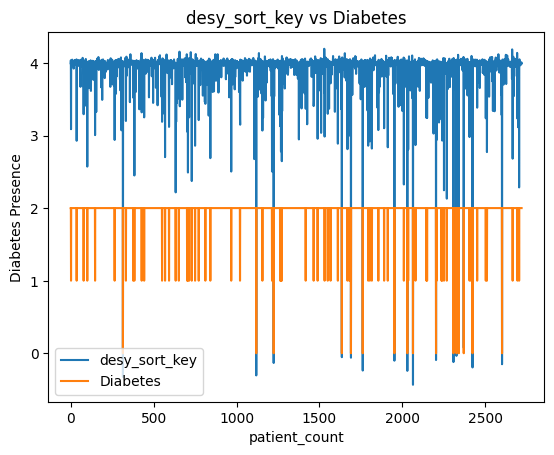

In [36]:
# Plot results
plt.plot(predictions_inv, label='desy_sort_key')
plt.plot(y_test_inv, label='Diabetes')

plt.title('desy_sort_key vs Diabetes')
plt.xlabel('patient_count')
plt.ylabel('Diabetes Presence')
plt.legend()

plt.show()

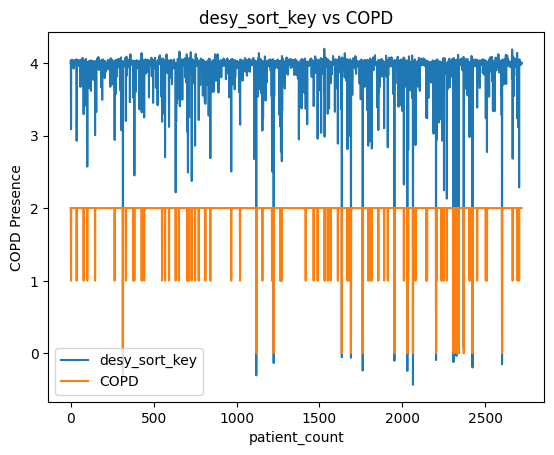

In [38]:
# Plot results
plt.plot(predictions_inv, label='desy_sort_key')
plt.plot(y_test_inv, label='COPD')

plt.title('desy_sort_key vs COPD')
plt.xlabel('patient_count')
plt.ylabel('COPD Presence')
plt.legend()

plt.show()

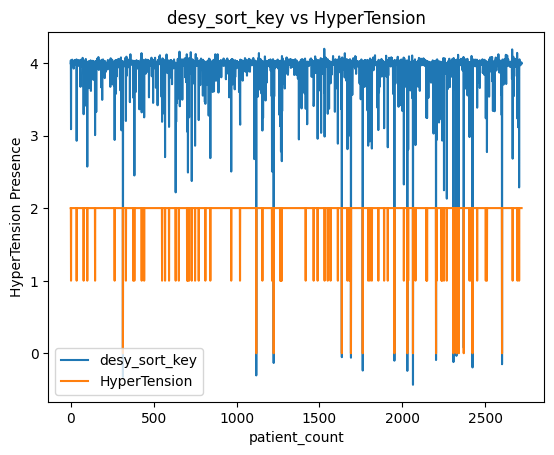

In [39]:
# Plot results
plt.plot(predictions_inv, label='desy_sort_key')
plt.plot(y_test_inv, label='HyperTension')

plt.title('desy_sort_key vs HyperTension')
plt.xlabel('patient_count')
plt.ylabel('HyperTension Presence')
plt.legend()

plt.show()

MSE:  3.8645518456404027
MAE:  1.9566654988181065
R-squared:  -80.9146813396343


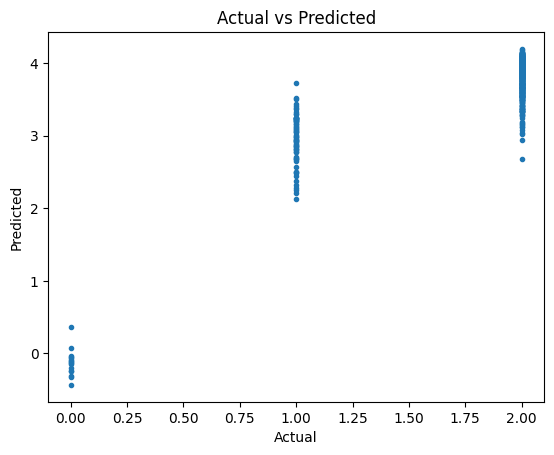

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
mae = mean_absolute_error(y_test_inv, predictions_inv)

print('MSE: ', mse)
print('MAE: ', mae)

# Additional metrics
from sklearn.metrics import r2_score
r2 = r2_score(y_test_inv, predictions_inv)
print('R-squared: ', r2)

import matplotlib.pyplot as plt
plt.plot(y_test_inv, predictions_inv, '.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Epoch 1/10
340/340 [==============================] - 3s 4ms/step - loss: 0.0439 - val_loss: 0.9828
Epoch 2/10
340/340 [==============================] - 1s 3ms/step - loss: 0.0063 - val_loss: 1.0066
Epoch 3/10
340/340 [==============================] - 1s 3ms/step - loss: 0.0052 - val_loss: 0.9982
Epoch 4/10
340/340 [==============================] - 1s 3ms/step - loss: 0.0050 - val_loss: 1.0141
Epoch 5/10
340/340 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.9956
Epoch 6/10
340/340 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.9718
Epoch 7/10
340/340 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.9887
Epoch 8/10
340/340 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 0.9899
Epoch 9/10
340/340 [==============================] - 2s 5ms/step - loss: 0.0045 - val_loss: 0.9889
Epoch 10/10
85/85 [==============================] - 0s 2ms/step


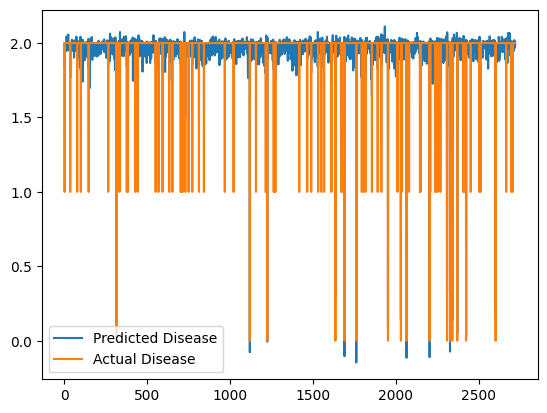

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame with the mentioned columns
# You may need to customize this part based on your dataset
features = df[['Diabetes','COPD','CKD','PVD','CAD','HyperTension','Age','Hemoglobin_A1C','Random_Glucose','Fasting_Glucose','BMI', 'Systolic_BP', 'Diastolic_BP', 'HDL_C', 'LDL_C', 'Total_Cholesterol', 'Triglycerides', 'COPDAssesstmet_Test', 'nMRC', 'FEV1/FVC_Ratio', 'FEV1', 'serum_creatinine', 'gfr', 'blood_urea_nitrogen', 'Albumin_to_creatinine_ratio']]

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features)

# Target variable (score at the end of the match)
target = df['ClassLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for GRU (samples, time steps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Convert to Numpy arrays
y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

# Scale target column
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train_arr.reshape(-1,1))
y_test_scaled = scaler.transform(y_test_arr.reshape(-1,1))

# Build the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_reshaped, y_train_scaled, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)




# Reshape predictions
predictions_reshaped = predictions.reshape(-1,1)

# Inverse transform
predictions_inv = scaler.inverse_transform(predictions_reshaped)
y_test_inv = scaler.inverse_transform(y_test_scaled)
# Plot the results
plt.plot(predictions_inv, label='Predicted Disease')
plt.plot(y_test_inv, label='Actual Disease')
plt.legend()
plt.show()


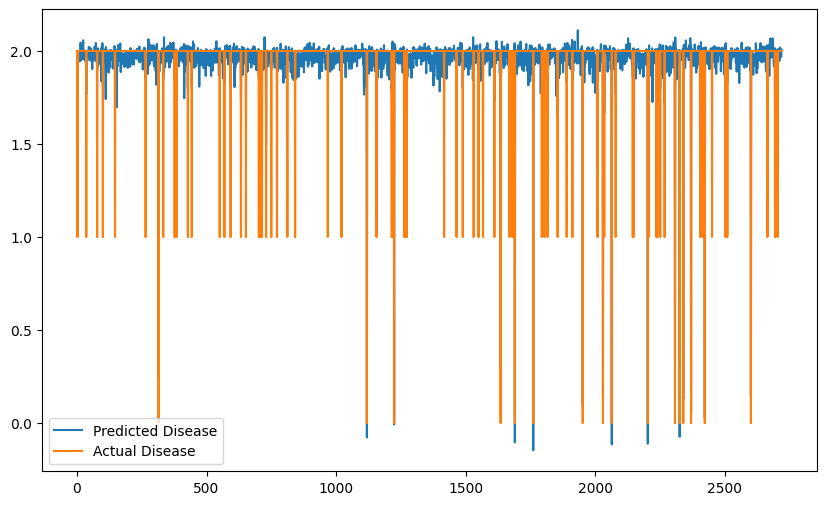

In [41]:
plt.figure(figsize=(10,6))
plt.plot(predictions_inv, label='Predicted Disease')
plt.plot(y_test_inv, label='Actual Disease')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(y_test_inv, predictions_inv)
mae = mean_absolute_error(y_test_inv, predictions_inv)

print('MSE: ', mse)
print('MAE: ', mae)

# Additional metrics
from sklearn.metrics import r2_score
r2 = r2_score(y_test_inv, predictions_inv)
print('R-squared: ', r2)


MSE:  0.01954825315821791
MAE:  0.05778214665239348
R-squared:  0.5856469282438707


In [43]:
predictions_inv

array([[1.952413 ],
       [1.9586302],
       [1.8449667],
       ...,
       [1.9818074],
       [1.968942 ],
       [2.00845  ]], dtype=float32)

In [44]:
y_test_inv

array([[2.],
       [2.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [47]:
import pickle
filename="disease.pkl"

f= open(filename,'wb')
pickle.dump(model, f)